In [17]:
import pandas as pd

stock_data_path = '../data/raw_data/stock_data.csv'
crypto_data_path = '../data/raw_data/crypto_data.csv'

try:
    stock_data = pd.read_csv(stock_data_path)
    print("Stock data loaded successfully.")
except FileNotFoundError:
    print("Stock data file not found.")
    stock_data = pd.DataFrame()

try:
    crypto_data = pd.read_csv(crypto_data_path)
    print("Crypto data loaded successfully.")
except FileNotFoundError:
    print("Crypto data file not found.")
    crypto_data = pd.DataFrame()


Stock data loaded successfully.
Crypto data loaded successfully.


In [18]:
# Reshaping stock data for analysis
if not stock_data.empty:
    stock_data_long = pd.melt(stock_data.reset_index(), id_vars=['index'], var_name='variable', value_name='value')
    stock_data_long['ticker'] = stock_data_long['variable'].apply(lambda x: x.split('.')[0])
    stock_data_long['metric'] = stock_data_long['variable'].apply(lambda x: x.split('.')[1] if '.' in x else 'price')
    stock_data_long['date'] = pd.to_datetime(stock_data_long['index'], origin='unix', unit='D')
    stock_data_long.drop(columns=['variable', 'index'], inplace=True)
    print(stock_data_long.head())
else:
    print("No stock data available for reshaping.")


                       value      ticker metric       date
0                        NaN  Unnamed: 0  price 1970-01-01
1                  timestamp  Unnamed: 0  price 1970-01-02
2  2024-05-03 04:00:00+00:00  Unnamed: 0  price 1970-01-03
3                      close         AGG  price 1970-01-01
4                        NaN         AGG  price 1970-01-02


In [19]:
import matplotlib.pyplot as plt

def plot_data_or_show_message(df, ticker, metric):
    filtered_df = df[(df['ticker'] == ticker) & (df['metric'] == metric)]
    
    if filtered_df.empty:
        fig, ax = plt.subplots()
        ax.text(0.5, 0.5, "No Data Available At This Time.", fontsize=12, ha='center')
        ax.axis('off')
        fig.savefig(f'../data/cleaned_data/{ticker}_{metric}_price.png')
        fig.savefig(f'../data/external_data/{ticker}_{metric}_price.png')
    else:
        plt.figure(figsize=(10, 5))
        plt.plot(filtered_df['date'], filtered_df['value'], label=f'{ticker} {metric}')
        plt.title(f'{ticker} {metric} Over Time')
        plt.xlabel('Date')
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.savefig(f'../data/cleaned_data/{ticker}_{metric}_price.png')
        plt.savefig(f'../data/external_data/{ticker}_{metric}_price.png')
        plt.show()


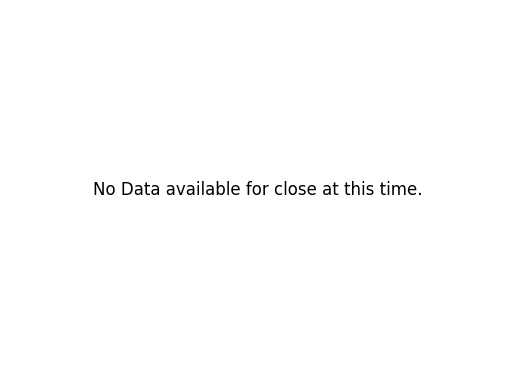

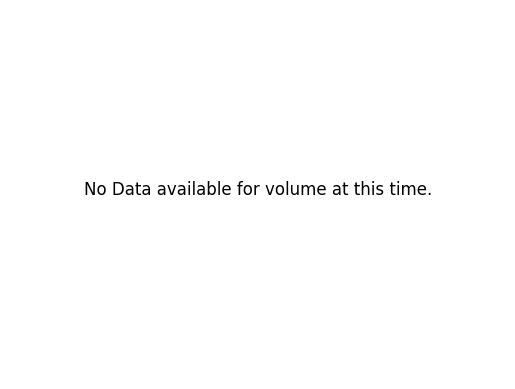

In [20]:
import matplotlib.pyplot as plt

def plot_stock_data(df, ticker):
    metrics = ['close', 'volume']
    for metric in metrics:
        filtered_df = df[(df['ticker'] == ticker) & (df['metric'] == metric)]
        if filtered_df.empty:
            fig, ax = plt.subplots()
            ax.text(0.5, 0.5, "No Data available for {} at this time.".format(metric), fontsize=12, ha='center')
            ax.axis('off')
            fig.savefig(f'../data/cleaned_data/{ticker}_{metric}.png')
            fig.savefig(f'../data/external_data/{ticker}_{metric}.png')
        else:
            plt.figure(figsize=(10, 5))
            plt.plot(filtered_df['date'], filtered_df['value'], label=f'{ticker} {metric}')
            plt.title(f'{ticker} {metric.capitalize()} Over Time')
            plt.xlabel('Date')
            plt.ylabel(metric.capitalize())
            plt.legend()
            plt.savefig(f'../data/cleaned_data/{ticker}_{metric}.png')
            plt.savefig(f'../data/external_data/{ticker}_{metric}.png')
            plt.show()

plot_stock_data(stock_data_long, 'AAPL')


In [21]:
import matplotlib.pyplot as plt

def plot_crypto_data(df, ticker):
    metrics = ['close', 'volume']
    for metric in metrics:
        filtered_df = df[(df['ticker'] == ticker) & (df['metric'] == metric)]
        if filtered_df.empty:
            fig, ax = plt.subplots()
            ax.text(0.5, 0.5, "No Crypto Data available for {} at this time.".format(metric), fontsize=12, ha='center')
            ax.axis('off')
            fig.savefig(f'../data/cleaned_data/crypto_{ticker}_{metric}.png')
            fig.savefig(f'../data/external_data/crypto_{ticker}_{metric}.png')
        else:
            plt.figure(figsize=(10, 5))
            plt.plot(filtered_df['date'], filtered_df['value'], label=f'{ticker} {metric}')
            plt.title(f'{ticker} {metric.capitalize()} Crypto Over Time')
            plt.xlabel('Date')
            plt.ylabel(metric.capitalize())
            plt.legend()
            plt.savefig(f'../data/cleaned_data/crypto_{ticker}_{metric}.png')
            plt.savefig(f'../data/external_data/crypto_{ticker}_{metric}.png')
            plt.show()

plot_crypto_data(crypto_data_long, 'BTC')


NameError: name 'crypto_data_long' is not defined

In [22]:
cleaned_stock_path = '../data/cleaned_data/cleaned_stock_data.csv'
if not stock_data_long.empty:
    stock_data_long.to_csv(cleaned_stock_path, index=False)
    print(f"Cleaned stock data saved to {cleaned_stock_path}")
else:
    print("No cleaned stock data to save.")


Cleaned stock data saved to ../data/cleaned_data/cleaned_stock_data.csv
